In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumerKey='HyPXWDKOsv6lWgrcKN17Jb4pq'
consumerSecret='H3hoMtF2HvXtHBPqgYAR6RHm52VgOLH6BmEU7HY4N9FS1vS5P5'
accessToken='1437782316391227399-MlyJXc3cHXlKEjqMBqHmqkrGTHr9Aw'
accessTokenSecret='esWCqMYvO83pai9Zsvf2k2fh41NIKv88tH3ymxY8XMKc3'

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [9]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="narendramodi", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Congratulations to Shri Charanjit Singh Channi Ji on being sworn-in as Punjab’s Chief Minister. Will continue to work with the Punjab government for the betterment of the people of Punjab.

2) Over time, I have received several gifts and mementos which are being auctioned. This includes the special mementos given by our Olympics heroes. Do take part in the auction. The proceeds would go to the Namami Gange initiative.

https://t.co/Oeq4EYb30M https://t.co/PrF44YWBrN

3) ଲବ୍ଧ ପ୍ରତିଷ୍ଠିତ ସାହିତ୍ୟିକା ମନୋରମା ମହାପାତ୍ରଜୀଙ୍କ ଦେହାନ୍ତ ଖବର ଶୁଣି ଦୁଃଖିତ । ବିଭିନ୍ନ ପ୍ରସଙ୍ଗରେ ତାଙ୍କର ଲେଖନୀ ଚାଳନା ପାଇଁ ସେ ସବୁଦିନ ପାଇଁ ମନେରହିବେ । ଗଣମାଧ୍ୟମ ଜଗତ ପାଇଁ ତାଙ୍କର ଅବଦାନ ତଥା ସମାଜସେବା କ୍ଷେତ୍ରରେ କାମ ତାଙ୍କୁ ଚିର ସ୍ମରଣୀୟ ରଖିବ । ତାଙ୍କର ଶୋକସନ୍ତପ୍ତ ପରିବାର ଏବଂ ପ୍ରଶଂସକଙ୍କୁ ସମବେଦନା ।

4) Anguished by the passing away of noted litterateur Manorama Mohapatra Ji. She will be remembered for her writings on a wide range of issues. She also made rich contributions to the media and did extensive community

In [10]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Congratulations to Shri Charanjit Singh Channi...
1,"Over time, I have received several gifts and m..."
2,ଲବ୍ଧ ପ୍ରତିଷ୍ଠିତ ସାହିତ୍ୟିକା ମନୋରମା ମହାପାତ୍ରଜୀଙ୍...
3,Anguished by the passing away of noted littera...
4,"In addition to COVID-19 vaccination, the Goa G..."


In [11]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Congratulations to Shri Charanjit Singh Channi...
1,"Over time, I have received several gifts and m..."
2,ଲବ୍ଧ ପ୍ରତିଷ୍ଠିତ ସାହିତ୍ୟିକା ମନୋରମା ମହାପାତ୍ରଜୀଙ୍...
3,Anguished by the passing away of noted littera...
4,"In addition to COVID-19 vaccination, the Goa G..."
...,...
95,Greetings on the sacred occasion of the Parkas...
96,It is our endeavour to create a modern educati...
97,"Powered by a spirit of Jan Bhagidari, India ha..."
98,"Today, key initiatives relating to the NEP wer..."


In [12]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Congratulations to Shri Charanjit Singh Channi...,0.000000,0.000000
1,"Over time, I have received several gifts and m...",0.285714,0.178571
2,ଲବ୍ଧ ପ୍ରତିଷ୍ଠିତ ସାହିତ୍ୟିକା ମନୋରମା ମହାପାତ୍ରଜୀଙ୍...,0.000000,0.000000
3,Anguished by the passing away of noted littera...,0.494444,0.091667
4,"In addition to COVID-19 vaccination, the Goa G...",0.500000,0.250000
...,...,...,...
95,Greetings on the sacred occasion of the Parkas...,0.762500,0.300000
96,It is our endeavour to create a modern educati...,0.197222,0.241667
97,"Powered by a spirit of Jan Bhagidari, India ha...",0.437500,0.056250
98,"Today, key initiatives relating to the NEP wer...",1.000000,0.000000


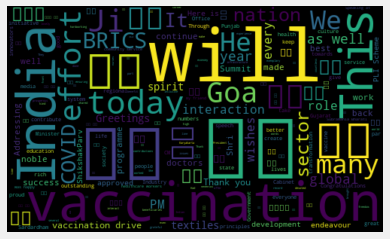

In [13]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Congratulations to Shri Charanjit Singh Channi...,0.000000,0.000000,Neutral
1,"Over time, I have received several gifts and m...",0.285714,0.178571,Positive
2,ଲବ୍ଧ ପ୍ରତିଷ୍ଠିତ ସାହିତ୍ୟିକା ମନୋରମା ମହାପାତ୍ରଜୀଙ୍...,0.000000,0.000000,Neutral
3,Anguished by the passing away of noted littera...,0.494444,0.091667,Positive
4,"In addition to COVID-19 vaccination, the Goa G...",0.500000,0.250000,Positive
...,...,...,...,...
95,Greetings on the sacred occasion of the Parkas...,0.762500,0.300000,Positive
96,It is our endeavour to create a modern educati...,0.197222,0.241667,Positive
97,"Powered by a spirit of Jan Bhagidari, India ha...",0.437500,0.056250,Positive
98,"Today, key initiatives relating to the NEP wer...",1.000000,0.000000,Neutral


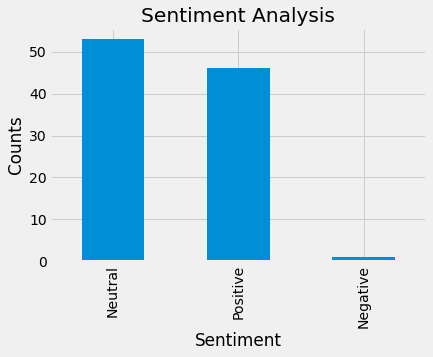

In [15]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()